In [1]:
%pylab --no-import-all
%matplotlib inline
import PyDSTool as pdt

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [67]:
ab = np.loadtxt('birdsynth/test/ba_example_ab.dat')
#ab = np.zeros((40000, 2))
ab[:, 0] += np.random.normal(0, 0.01, len(ab))


In [68]:
t_mom = np.linspace(0, len(ab)/44100, len(ab))
inputs = pdt.pointset_to_traj(pdt.Pointset(coorddict={'a': ab[:, 1], 'b':ab[:, 0]}, indepvardict={'t': t_mom}))

# Jacobian calculation

In [205]:
x = pdt.Var('x')
y = pdt.Var('y')
gm = pdt.Par('gm')
a = pdt.Par('a')
b = pdt.Par('b')
t = pdt.Var('t')

In [206]:
xdot = pdt.Fun(y, [y], 'xdot')
ydot = pdt.Fun(-a*gm*gm - b*gm*gm*x -gm*gm*x*x*x -gm*x*x*y + gm*gm*x*x - gm*x*y, [x, y], 'ydot')
F = pdt.Fun([xdot(y), ydot(x, y)], [x,y], 'F')
jac = pdt.Fun(pdt.Diff(F, [x, y]), [t, x, y], 'Jacobian')
jac.simplify()
print(jac.eval(t=t, x=x, y=y))

[[0,1],[(((-b*gm*gm)-gm*gm*(x*x+x*2*x))-gm*(x*y+x*y)+gm*gm*2*x)-gm*y,(-gm*x*x)-gm*x]]


# Simple model

In [210]:
icdict = {'x': 0, 'y': 0}
pardict = {
    'gm': 2  # g is γ in Boari 2015
}
vardict = {
    'x': xdot(y),
    'y': ydot(x,y),
          }

args = pdt.args()
args.name = 'birdsynth'
args.fnspecs = [jac, xdot, ydot]
args.ics = icdict
args.pars = pardict
args.inputs = inputs
args.tdata = [0, 1]
args.varspecs = vardict

ds = pdt.Generator.Vode_ODEsystem(args)

In [211]:
ds.haveJacobian()

True

In [212]:
traj = ds.compute('demo')

Exception ignored in: <bound method Vode_ODEsystem.__del__ of Generator birdsynth>
Traceback (most recent call last):
  File "/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/PyDSTool/Generator/Vode_ODEsystem.py", line 923, in __del__
    ODEsystem.__del__(self)
  File "/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/PyDSTool/Generator/ODEsystem.py", line 525, in __del__
    ctsGen.__del__(self)
  File "/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/PyDSTool/Generator/baseclasses.py", line 1430, in __del__
    Generator.__del__(self)
  File "/home/ecoffet/.virtualenvs/birdsongs/lib/python3.5/site-packages/PyDSTool/Generator/baseclasses.py", line 1381, in __del__
    delattr(eval(finfo[0]), fname)
SyntaxError: unexpected EOF while parsing (<string>, line 0)


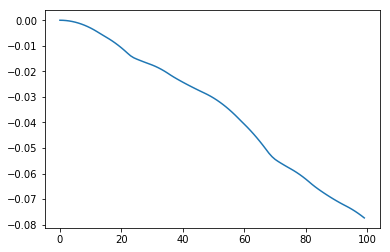

In [213]:
plt.plot(traj.sample(dt=1/(44100*20))['x'])

In [21]:
auxdict = {'Pi':(['t', 'x', 'a_'], 'if(t > 0, a_ * x - r * 1, 0)'),
           'Pt':(['t', 'x', 'a_'], '(1 - r) * Pi(t - 0.5 * T, x, a_)')
          }

In [30]:
icdict = {'x': 0, 'y': 0, 'o1':0, 'i1':0, 'i3':0}
pardict = {'g': 2400,  # g is γ in Boari 2015
           'T': 0.2,
           'r': 0.1,
           'a_p': -540e6,
           'b_p': -7800,
           'c_p': 1.8e8,
           'd_p': 1.2e-2,
           'e_p': 7.2e-1,
           'f_p': -0.83e-2,
           'g_p': -5e2,
           'h_p': 1e-4
          }
vardict = {'x': 'y',
           'y': '-a*Pow(g, 2) - b * Pow(g, 2) * x - Pow(g, 2) * Pow(x, 3) - g * Pow(x, 2) * y + Pow(g, 2) * x * x'
                  '- g * x * y',
          'i1': 'o1',
          'o1': 'a_p * i1 + b_p * o1 + c_p * i3 + d_p * Pt(t, x, a) + e_p * Pt(t, x, a)',
          'i3': 'f_p * o1 + g_p * i3 + h_p * Pt(t, x, a)'
          }

args = pdt.args()
args.name = 'birdsynth'
args.ics = icdict
args.pars = pardict
args.fnspecs = auxdict
args.inputs = inputs
args.tdata = [0, len(ab)/44100]
args.varspecs = vardict

In [31]:
ds = pdt.Generator.Vode_ODEsystem(args)

In [32]:
traj = ds.compute('demo')

In [33]:
pts = traj.sample(dt=1/(44100))

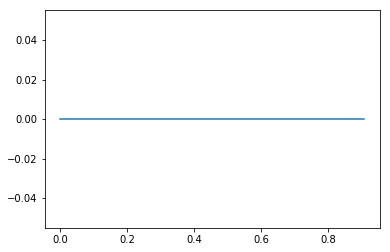

In [34]:
plt.plot(pts['t'], pts['x'])

In [ ]:
x = ds.variables['x']

In [ ]:
y_0 = pdt.Var('-a*Pow(g, 2) - b * Pow(g, 2) * x - Pow(g, 2) * Pow(x, 3) - g * Pow(x, 2) * y + Pow(g, 2) * x * x'
                  '- g * x * y', 'y_0')

In [ ]:
Pi(2)